In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/workout-and-fitness-tracker-data/workout_fitness_tracker_data.csv


## Title :"Workout & Fitness Tracker: Unlocking Health Metrics with Data Analysis"

## Detailed Dataset Description:
The Workout & Fitness Tracker Dataset provides a structured view of individuals’ workout habits, health parameters, and lifestyle choices. This dataset enables data-driven insights into fitness patterns, helping to optimize training plans, track calorie expenditure, and analyze health correlations.

1️⃣ Dataset Overview

Objective: Analyze workout patterns, fitness trends, and their impact on health metrics.

## Use Cases:

Predicting calorie burn based on workout type.

Analyzing heart rate variations with workout intensity.

Correlating sleep, hydration, and exercise performance.

Developing machine learning models for fitness recommendations.

## Column Descriptions

Column Name	Description

User ID	Unique identifier for each user.

Age	Age of the individual in years.

Gender	Categorical feature (Male/Female/Other).

Height (cm)	Height of the user in centimeters.

Weight (kg)	Weight of the user in kilograms.

Workout Type	Type of workout (e.g., Cardio, Strength, Yoga).

Workout Duration (mins)	Total duration of workout in minutes.

Calories Burned	Total calories burned during the workout.

Heart Rate (bpm)	Average heart rate during the session.

Steps Taken	Total steps counted in the workout session.

Distance (km)	Distance covered in kilometers.

Workout Intensity	Workout difficulty level (Low, Medium, High).

Sleep Hours	Number of sleep hours recorded per day.

Water Intake (liters)	Daily water consumption in liters.

Daily Calories Intake	Total calories consumed per day.

Resting Heart Rate (bpm)	User’s heart rate at rest.

VO2 Max	Maximum oxygen uptake (indicator of cardiovascular fitness).

Body Fat (%)	Percentage of body fat.

Mood Before Workout	Mood rating before the workout (e.g., Happy, Tired).

Mood After Workout	Mood rating after the workout.

## 3️⃣ Potential Insights & Visualizations

🔹 Correlation Analysis:

Relationship between workout intensity and calories burned.

How sleep hours impact resting heart rate & VO2 Max.

Effect of hydration levels on workout performance.

🔹 Machine Learning Predictions:

Predict calories burned based on age, weight, workout type, and intensity.

Classify workout type using heart rate, steps, and distance.

Recommend optimal workout duration based on user’s health profile.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

: 

## Import dataset

In [3]:
df = pd.read_csv('/kaggle/input/workout-and-fitness-tracker-data/workout_fitness_tracker_data.csv')

In [4]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [5]:
df.tail()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued
9999,10000,47,Female,186,88,HIIT,56,978,126,8062,12.24,High,6.9,1.9,3056,84,38.4,28.5,Tired,Energized


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [7]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [8]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

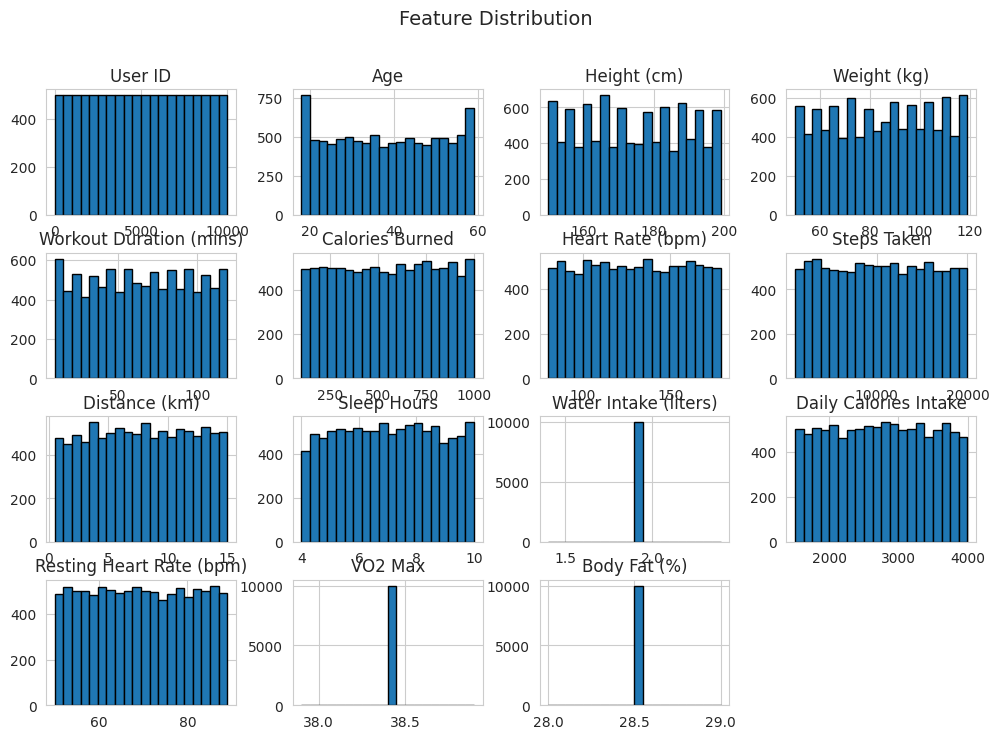

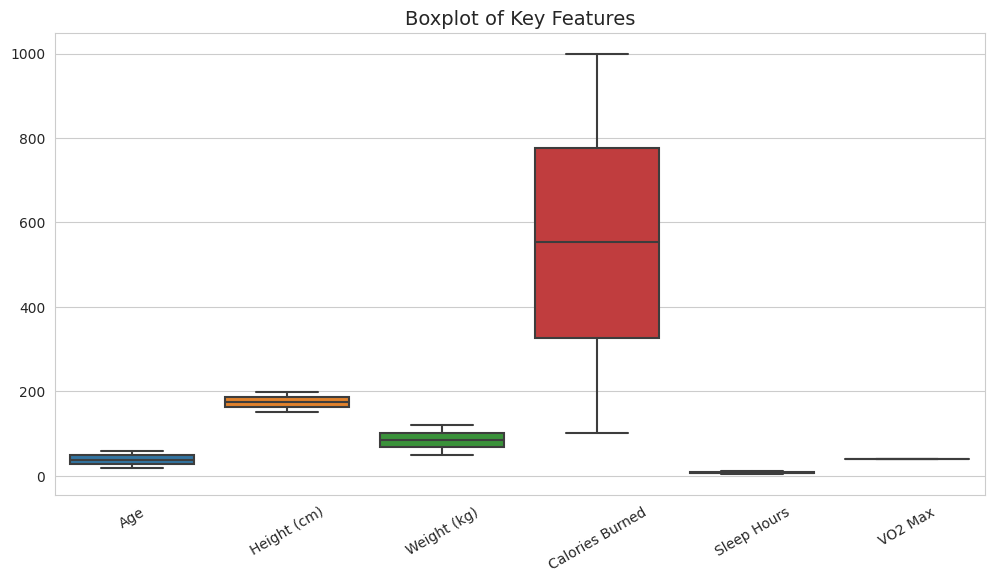

In [11]:
# Set plot style
sns.set_style("whitegrid")

# Histogram for numeric features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distribution", fontsize=14)
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Height (cm)', 'Weight (kg)', 'Calories Burned', 'Sleep Hours', 'VO2 Max']])
plt.title("Boxplot of Key Features", fontsize=14)
plt.xticks(rotation=30)
plt.show()

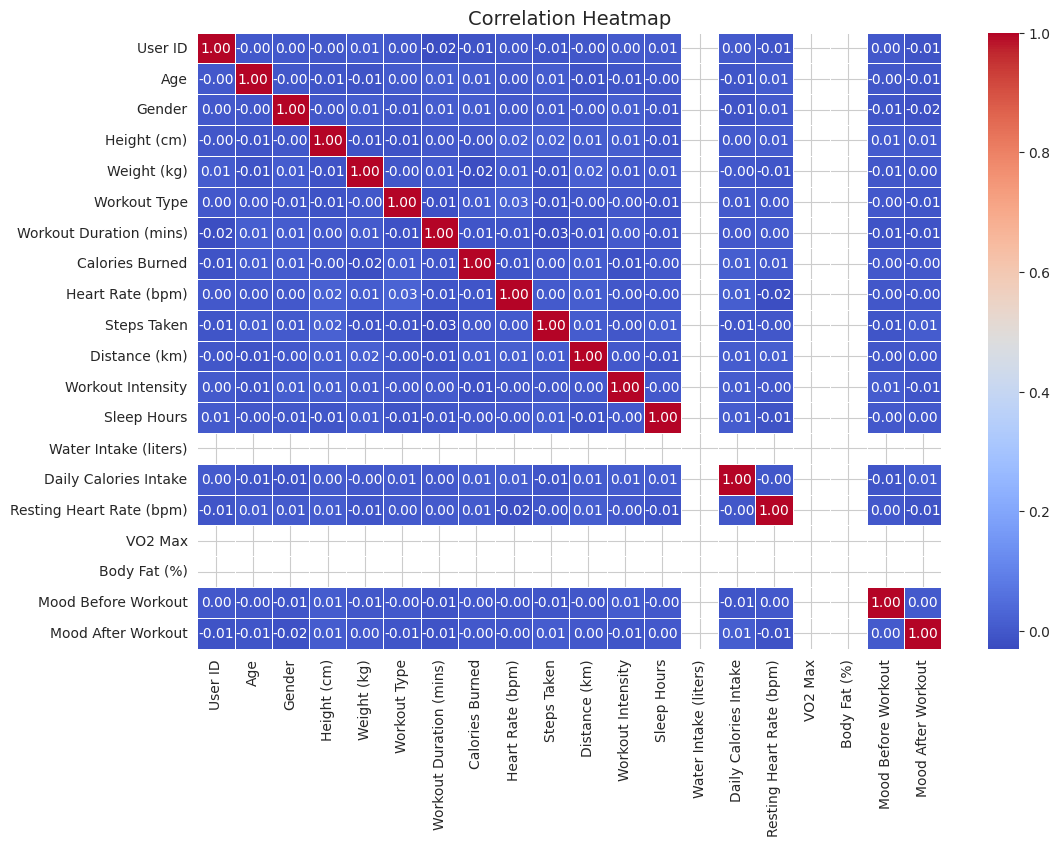

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes  

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

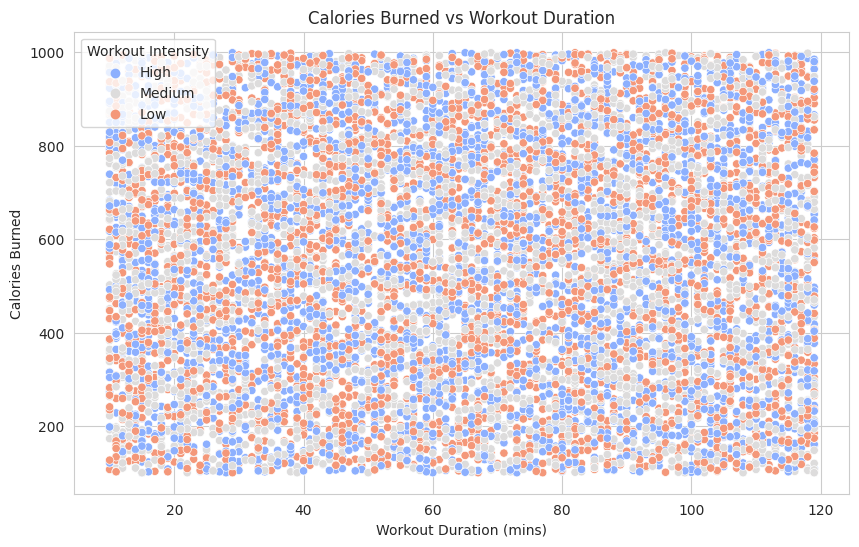

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Workout Duration (mins)'], y=df['Calories Burned'], hue=df['Workout Intensity'], palette="coolwarm")
plt.xlabel("Workout Duration (mins)")
plt.ylabel("Calories Burned")
plt.title("Calories Burned vs Workout Duration")
plt.show()

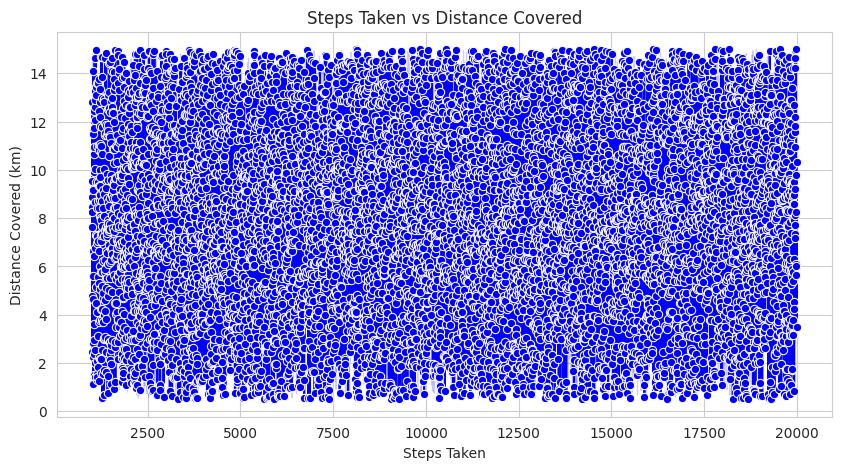

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Steps Taken'], y=df['Distance (km)'], marker="o", color="b")
plt.xlabel("Steps Taken")
plt.ylabel("Distance Covered (km)")
plt.title("Steps Taken vs Distance Covered")
plt.show()

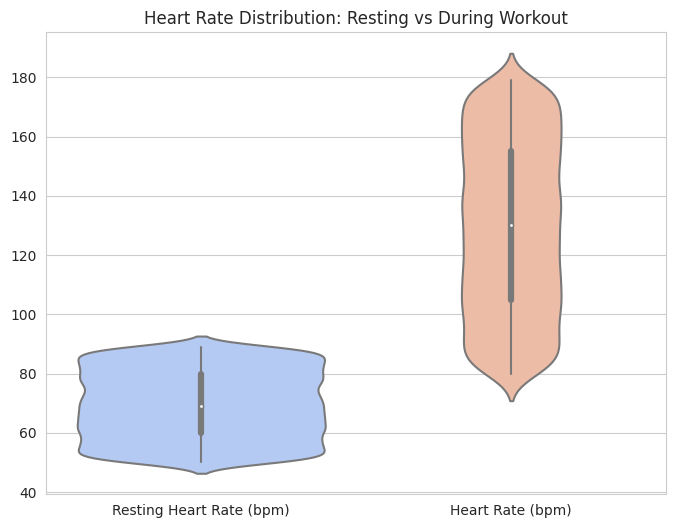

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df[['Resting Heart Rate (bpm)', 'Heart Rate (bpm)']], palette="coolwarm")
plt.title("Heart Rate Distribution: Resting vs During Workout")
plt.show()

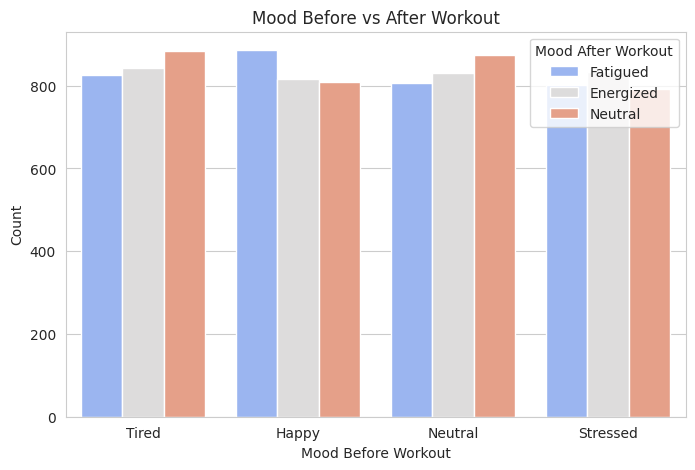

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Mood Before Workout"], hue=df["Mood After Workout"], palette="coolwarm")
plt.title("Mood Before vs After Workout")
plt.xlabel("Mood Before Workout")
plt.ylabel("Count")
plt.legend(title="Mood After Workout")
plt.show()

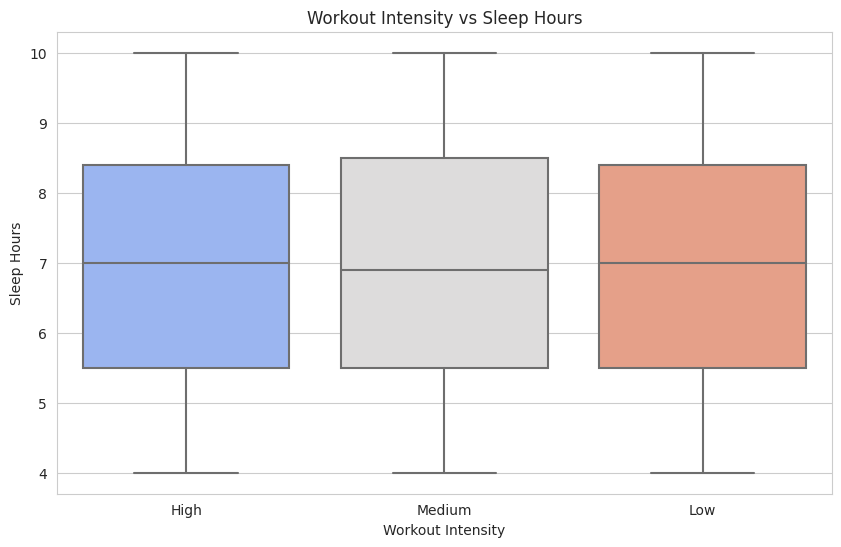

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Workout Intensity"], y=df["Sleep Hours"], palette="coolwarm")
plt.title("Workout Intensity vs Sleep Hours")
plt.xlabel("Workout Intensity")
plt.ylabel("Sleep Hours")
plt.show()

## EDA

In [18]:
df['Gender'].value_counts().to_dict()

{'Other': 3392, 'Male': 3370, 'Female': 3238}

In [19]:
from sklearn.manifold import TSNE

COLUMNS = [key for key, value in df.dtypes.to_dict().items() if str(value) in {'float64', 'int64'}]
RANDOM_STATE = 2025
TARGET = 'Gender'

reducer = TSNE(random_state=RANDOM_STATE)
plot_df = pd.DataFrame(columns=['x', 'y'], data=reducer.fit_transform(X=df[COLUMNS]))
plot_df[TARGET] = df[TARGET].tolist()

In [20]:
from plotly import express
from plotly import io

io.renderers.default = 'iframe'
express.scatter(data_frame=plot_df, x='x', y='y', color=TARGET)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Drop 'User ID' as it is not a useful feature
df = df.drop(columns=['User ID'], errors='ignore')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=['Workout Type'])  # Assuming 'Workout Type' is the target variable
y = df['Workout Type']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ML models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy * 100

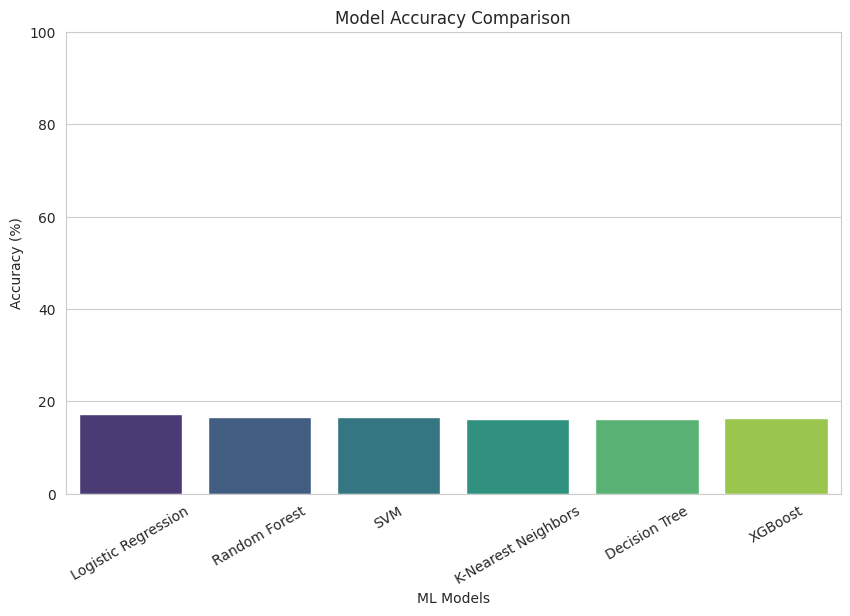

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.xlabel("ML Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.ylim(0, 100)
plt.show()

In [25]:
express.scatter(data_frame=df, x='Height (cm)', y='Weight (kg)', color=TARGET, facet_col=TARGET)

## conducted by barsha